In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [50]:
#loading the data
data = pd.read_csv("bank_data.csv")
#getting the first five observations
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.shape
#41188 observation, 21 features

(41188, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [6]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

In [7]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

<AxesSubplot:>

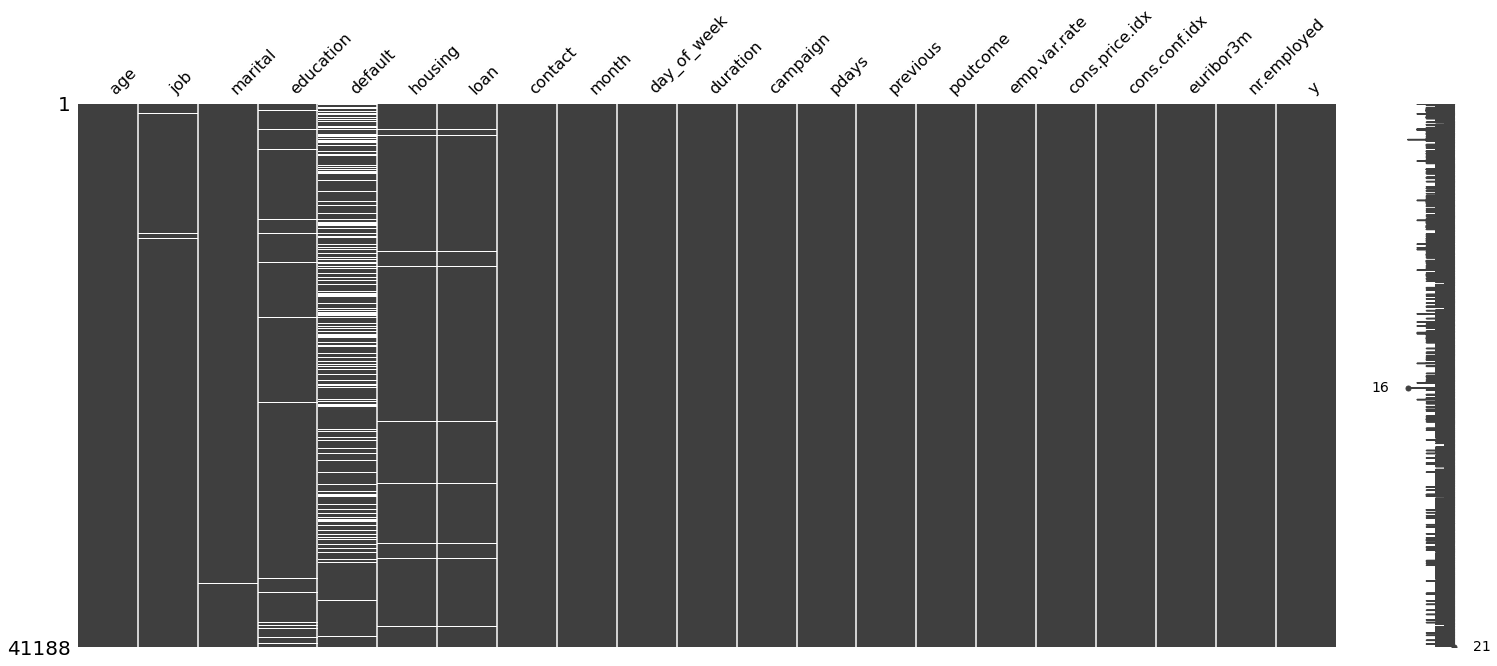

In [8]:
%matplotlib inline
import missingno as msno
msno.matrix(data)

#### The housing_loan columns relies on the loan column. This explains the equal number of missing values in the two column

In [51]:
bankd = data.copy()

In [52]:
bankd.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### The housing_loan should be dropped since it falls under loan column

In [53]:
bankd = bankd.drop('housing',axis=1)

#### The duration should be dropped as it greatly affect the output target

In [54]:
bankd = bankd.drop('duration',axis=1)

In [13]:
bankd['marital'].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

<AxesSubplot:xlabel='marital', ylabel='count'>

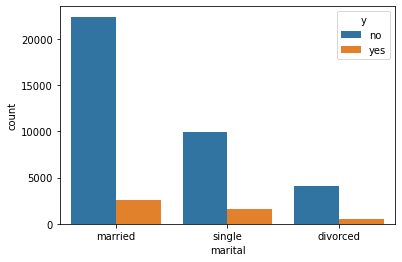

In [14]:
sns.countplot(x='marital',data=bankd,hue='y')

#### The married category has the most applicants that subscribed and didn't subscribe for the term deposit

In [55]:
bankd['marital'].fillna('married',inplace=True)

<AxesSubplot:xlabel='y', ylabel='age'>

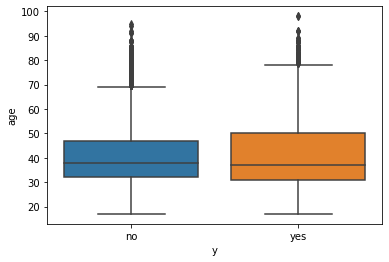

In [16]:
sns.boxplot(x='y',y='age',data=bankd)

<AxesSubplot:xlabel='marital', ylabel='age'>

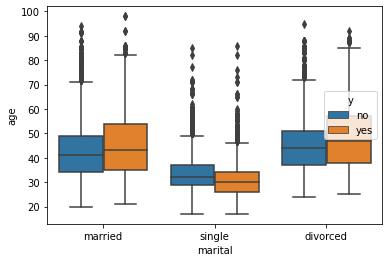

In [17]:
sns.boxplot(x='marital',y='age',data=bankd,hue='y')

<AxesSubplot:xlabel='y', ylabel='age'>

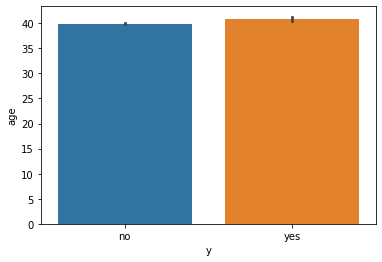

In [18]:
sns.barplot(x='y',y='age',data=bankd)

In [56]:
bankd['age'].fillna(45,inplace=True)

In [20]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

In [21]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

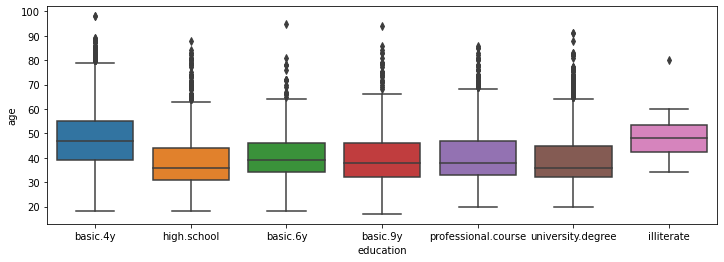

In [22]:
plt.figure(figsize=(12,4))
sns.boxplot(x='education',y='age',data=bankd)
plt.show()

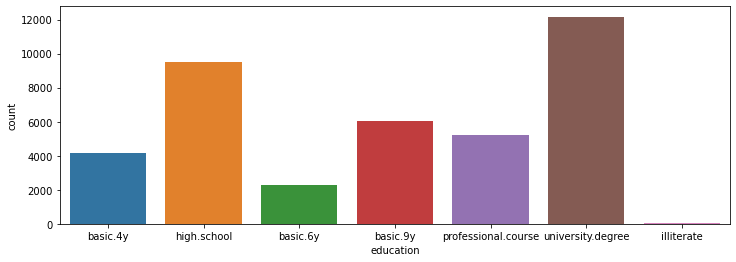

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(x='education',data=bankd)
plt.show()

In [57]:
bankd['education'].fillna('illiterate',inplace=True)

In [25]:
bankd['default'].value_counts()

no     32588
yes        3
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

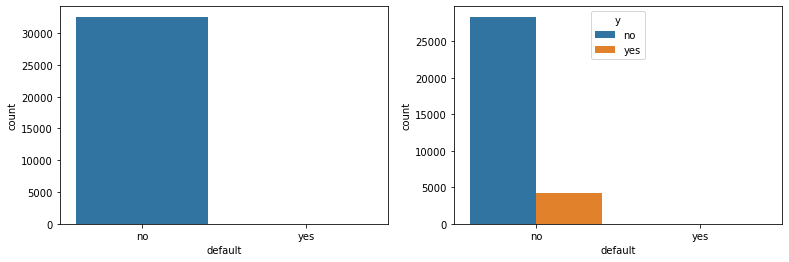

In [26]:
plt.figure(1,figsize=(20,4))
plt.subplot(131)
sns.countplot(x='default',data=bankd)
plt.subplot(132)
sns.countplot(x='default',data=bankd,hue='y')


#### All but three applicants do not have credit in fault(99.9% of the applicants do have  credit in default) and about 92% of the 99.9% did not subscribe to a term deposit

In [59]:
bankd['default'].fillna('yes',inplace=True)

In [60]:
bankd['loan'].value_counts()

no     33950
yes     6248
Name: loan, dtype: int64

<AxesSubplot:xlabel='loan', ylabel='count'>

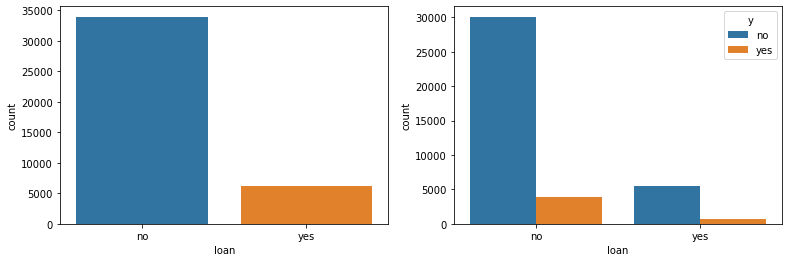

In [29]:
plt.figure(1,figsize=(20,4))
plt.subplot(131)
sns.countplot(x='loan',data=bankd)
plt.subplot(132)
sns.countplot(x='loan',data=bankd,hue='y')


In [61]:
bankd['loan'].fillna('yes',inplace=True)

In [31]:
bankd['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

<AxesSubplot:xlabel='job', ylabel='count'>

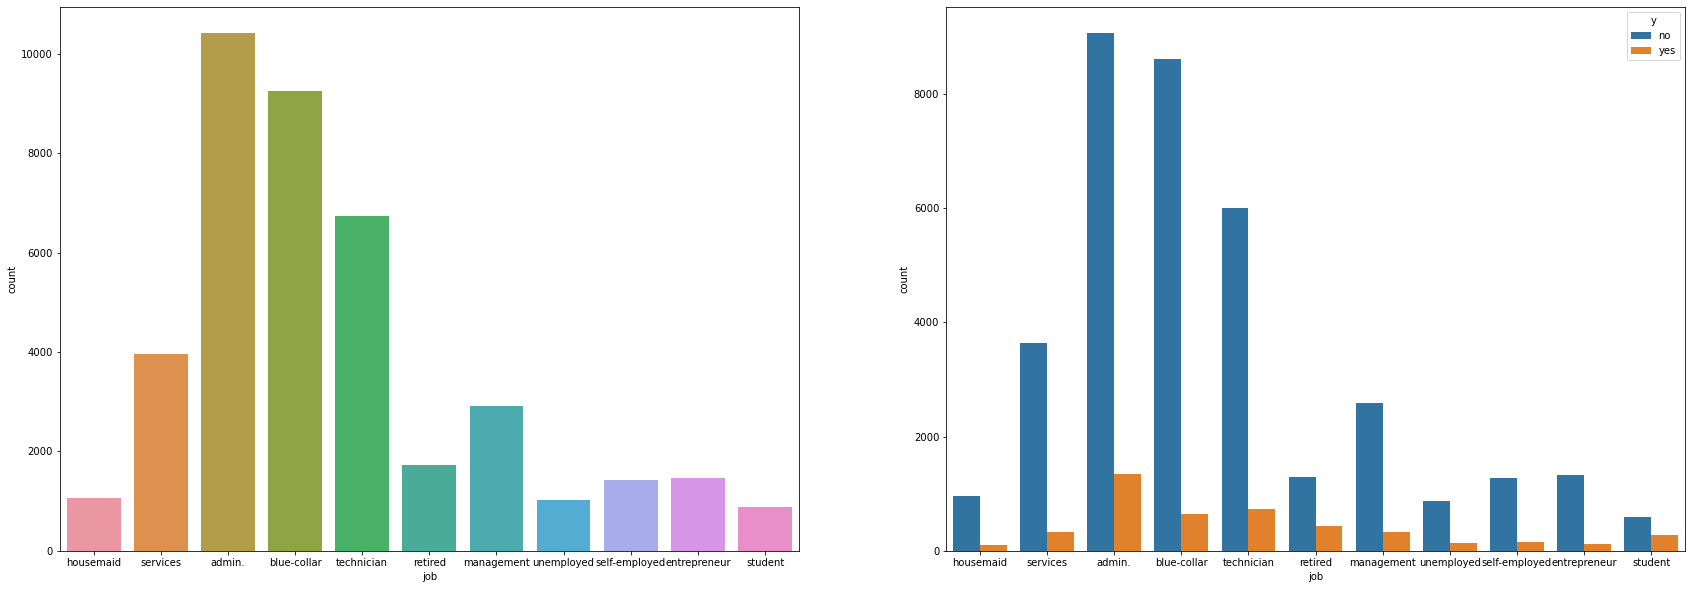

In [32]:
plt.figure(1,figsize=(45,10))
plt.subplot(131)
sns.countplot(x='job',data=bankd)
plt.subplot(132)
sns.countplot(x='job',data=bankd,hue='y')

In [62]:
bankd['job'].fillna('unemployed',inplace=True) #filling the missing values with 'unemployed'

In [34]:
bankd.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [35]:
bankd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [63]:
dummy = pd.get_dummies(bankd[['month','job','education','contact','day_of_week','poutcome']])

In [64]:
new_data = pd.DataFrame(bankd[['age','pdays', 'previous','campaign','emp.var.rate', 
                              'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed','default','loan','y']])

In [38]:
new_data.head()

,age,pdays,previous,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,loan,y
0,56,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,no,no
1,57,999,0,1,1.1,93.994,-36.4,4.857,5191.0,yes,no,no
2,37,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,no,no
3,40,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,no,no
4,56,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,yes,no


In [65]:
new_data['y'] = new_data['y'].map({'yes':1,'no':0})
new_data['default'] = new_data['default'].map({'yes':1,'no':0})
new_data['loan'] = new_data['loan'].map({'yes':1,'no':0})

In [66]:
det = pd.DataFrame(new_data[['default','loan','y']])

In [67]:
new_data = pd.concat([new_data,dummy],axis=1)
new_data = pd.concat([new_data,det],axis=1)

In [42]:
new_data.head()

,age,pdays,previous,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,default,loan,y
0,56,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,0,1,0,0,0,0
1,57,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,...,1,0,0,0,0,1,0,1,0,0
2,37,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,0,1,0,0,0,0
3,40,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,0,1,0,0,0,0
4,56,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,0,1,0,0,1,0


In [68]:
x = new_data.iloc[:,:-1].values
y = new_data.iloc[:,-1].values

In [125]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5,random_state=2,shuffle=True)
#from sklearn.linear_model import LogisticRegression
#lrg = LogisticRegression()

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y, test_size=0.3,random_state=42)
x_train_val,x_test_val,y_train_val,y_test_val = train_test_split(x_train,y_train,random_state=42)

In [70]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train_val = scl.fit_transform(x_train_val)
x_test = scl.transform(x_test)
x_test_val = scl.transform(x_test_val)


In [75]:
from sklearn.linear_model import LogisticRegression
lrg = LogisticRegression()
lrg.fit(x_train_val,y_train_val)
pred =  lrg.predict(x_test_val)

In [76]:
lrg.score(x_test,y_test)

1.0

In [47]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lrg,x,y,scoring='accuracy')
print(cv_scores)

[1. 1. 1. 1. 1.]


In [2]:
import xgboost as x


TypeError: 'module' object is not callable

In [127]:
#from sklearn.preprocessing import StandardScaler
#scl = StandardScaler()
#x_train = scl.fit_transform(x_train)
#x_test = scl.transform(x_test)

In [128]:
scores =[]
for in range(5):
    for train_index,test_index in kf.split(x):
        x_train,x_test = train

SyntaxError: invalid syntax (<ipython-input-128-dc0f99d2d1f7>, line 2)

In [124]:
pre = lrg.predict(x_train)
pre_val = lrg.predict(x_test)

In [120]:
#print(f"The training accuracy is : {lrg.score(y_train_val,pre)}")
print(f"The training accuracy is : {lrg.score(x_test,pre_val)}")
print(lrg.score(x_train,pre))

The training accuracy is : 1.0
1.0


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pre_val))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12188
           1       1.00      1.00      1.00      1541

    accuracy                           1.00     13729
   macro avg       1.00      1.00      1.00     13729
weighted avg       1.00      1.00      1.00     13729



In [ ]:
data.corr()